In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import os

In [93]:
def read_data(scenario, impact_category):
    # Import the MC datasets

    cwd = os.getcwd()
    folder_path = os.path.join(cwd, '..\\')
    raw_data = pd.read_excel(os.path.join(folder_path, f'{scenario}_MC.xlsx'), 'Impact Assessment', header=1, usecols=lambda x: 'Unnamed' not in x,)

    data = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 10:].astype('float') / 1000
    mean = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 3].astype('float') / 1000
    median = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 7].astype('float') / 1000
    stdev = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 4].astype('float') / 1000
    p5 = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 8].astype('float') / 1000
    p95 = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 9].astype('float') / 1000

    return data, mean, median, stdev, p5, p95

In [94]:
Baseline_data, Baseline_mean, Baseline_median, Baseline_stdev, Baseline_p5, Baseline_p95 = read_data('Baseline', 'Climate change')
Baseline_LFP_data, Baseline_LFP_mean, Baseline_LFP_median, Baseline_LFP_stdev, Baseline_LFP_p5, Baseline_LFP_p95 = read_data('Baseline_LFP', 'Climate change')
CuFe_data, CuFe_mean, CuFe_median, CuFe_stdev, CuFe_p5, CuFe_p95 = read_data('CuFe', 'Climate change')
CuFe_LFP_data, CuFe_LFP_mean, CuFe_LFP_median, CuFe_LFP_stdev, CuFe_LFP_p5, CuFe_LFP_p95 = read_data('CuFe_LFP', 'Climate change')

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


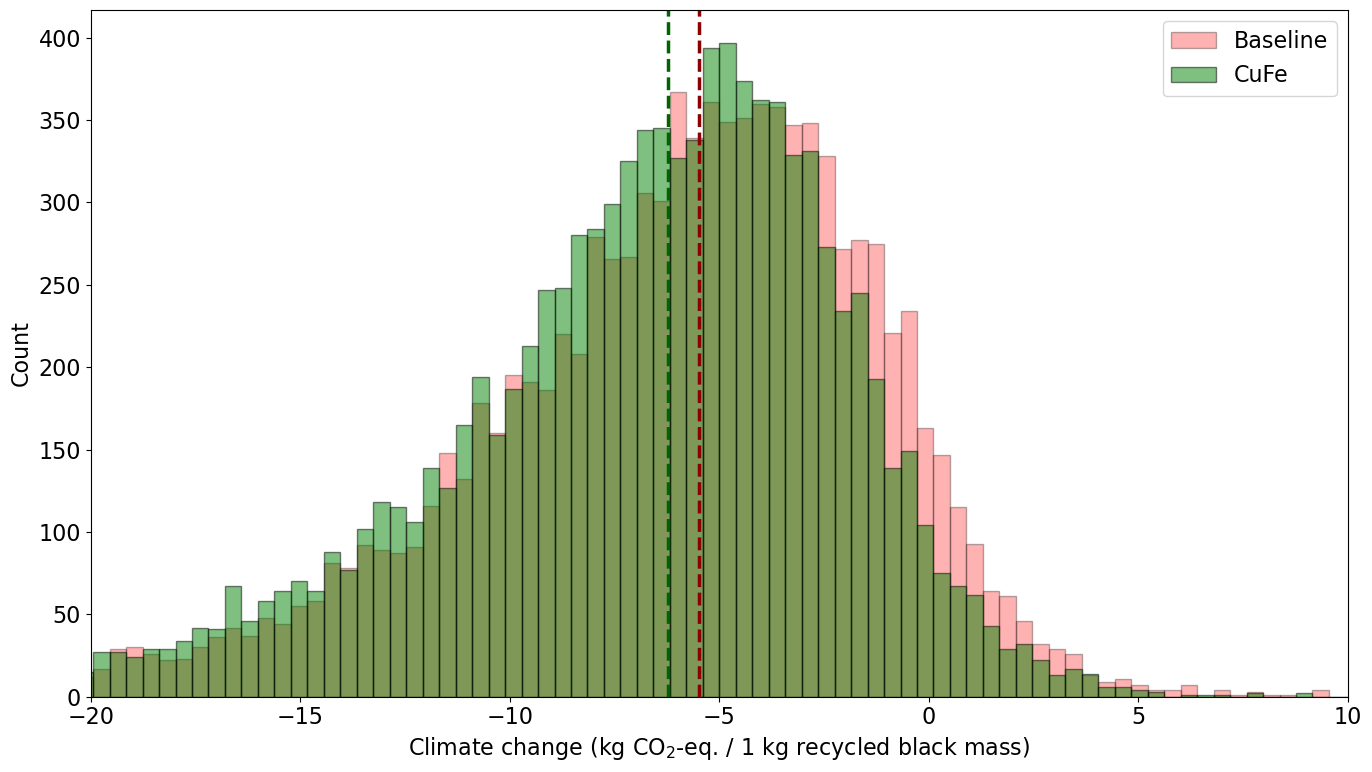

In [113]:
# Plot the data

fig, ax = plt.subplots(figsize=(14, 8))
mpl.rcParams.update({'font.size': 16})

bins = np.histogram(np.hstack((Baseline_data.values, Baseline_LFP_data.values)), bins=200)[1]

ax.hist(Baseline_data.values, bins=bins, alpha=0.3, label='Baseline', color='red', edgecolor='k')
# ax.hist(Baseline_LFP_data.values, bins=bins, alpha=0.5, label='Baseline-LFP', color='orange', edgecolor='k')
ax.hist(CuFe_data.values, bins=bins, alpha=0.5, label='CuFe', color='green', edgecolor='k')
# ax.hist(CuFe_LFP_data.values, bins=bins, alpha=0.3, label='CuFe-LFP', color='blue', edgecolor='k')

plt.axvline(Baseline_median, color='darkred', linestyle='dashed', linewidth=2.5)
# plt.axvline(Baseline_LFP_median, color='darkorange', linestyle='dashed', linewidth=2.5)
plt.axvline(CuFe_median, color='darkgreen', linestyle='dashed', linewidth=2.5)
# plt.axvline(CuFe_LFP_median, color='darkblue', linestyle='dashed', linewidth=2.5)

plt.xlabel('Climate change (kg CO$_2$-eq. / 1 kg recycled black mass)')
plt.ylabel('Count')

plt.xlim([-20, 10])
# plt.xlim([-10000, 0])

ax.legend()
plt.tight_layout()
plt.show()

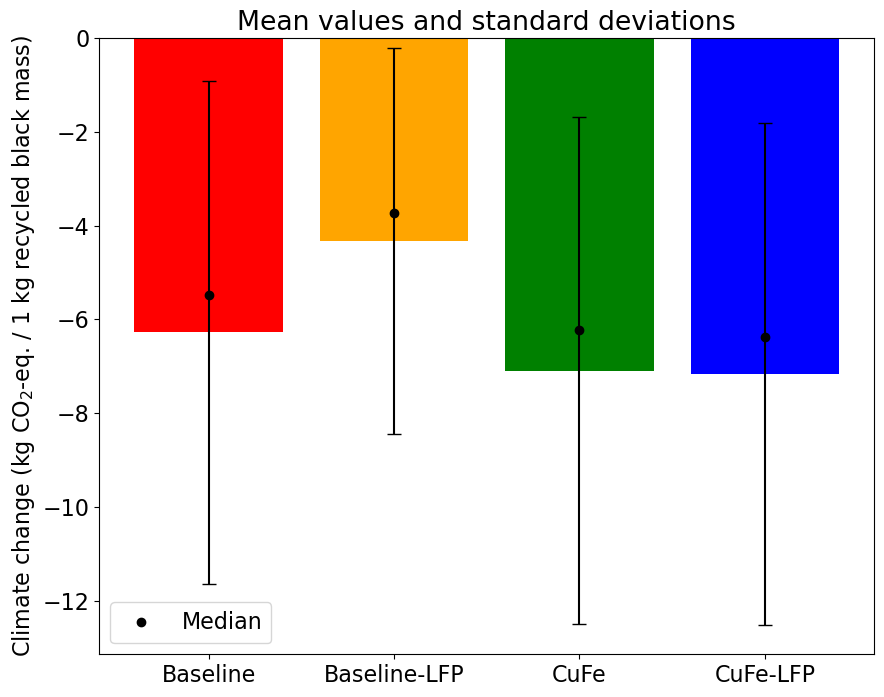

In [121]:
fig, ax = plt.subplots(figsize=(10, 8))
mpl.rcParams.update({'font.size': 16})

ax.bar(
    ['Baseline', 'Baseline-LFP', 'CuFe', 'CuFe-LFP'],
    [Baseline_mean, Baseline_LFP_mean, CuFe_mean, CuFe_LFP_mean],
    color=['red', 'orange', 'green', 'blue'],
    # alpha=0.5,
    yerr=[Baseline_stdev, Baseline_LFP_stdev, CuFe_stdev, CuFe_LFP_stdev],
    capsize=5
)
ax.plot(
    ['Baseline', 'Baseline-LFP', 'CuFe', 'CuFe-LFP'],
    [Baseline_median, Baseline_LFP_median, CuFe_median, CuFe_LFP_median],
    # color=['red', 'orange', 'green', 'blue'],
    'ko',
    label='Median'
)

plt.title('Mean values and standard deviations')
plt.ylabel('Climate change (kg CO$_2$-eq. / 1 kg recycled black mass)')

plt.legend()
plt.show()